In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.stattools import adfuller

In [2]:
start = datetime(2002, 1, 1)
end = datetime(2021, 9, 29)

In [2]:
mxl = web.DataReader('MXL', 'yahoo', start=start, end=end)
mxl

NameError: name 'start' is not defined

In [4]:
returns = 100 * mxl.Close.pct_change().dropna()
returns

Date
2010-03-25   -3.529411
2010-03-26    3.215077
2010-03-29    0.429645
2010-03-30   -2.406421
2010-03-31   -2.575339
                ...   
2021-09-23    1.361075
2021-09-24    0.709762
2021-09-27    0.209525
2021-09-28   -4.961035
2021-09-29   -1.000000
Name: Close, Length: 2900, dtype: float64

In [5]:
returns.var()

10.539718701035945

In [5]:
result = adfuller(returns)
print('MXL Returns ADF Test')
print("ADF Statistic: %f" %result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

MXL Returns ADF Test
ADF Statistic: -16.446807
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Text(0.5, 1.0, 'MXL Returns')

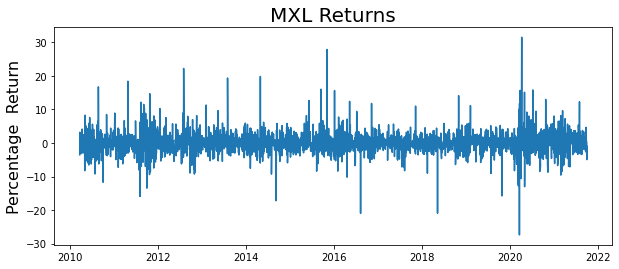

In [6]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Percentage  Return', fontsize=16)
plt.title('MXL Returns', fontsize=20)

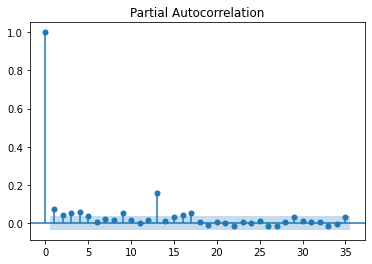

In [9]:
plot_pacf(returns**2)
plt.show()

# Splitting Data

In [7]:
train, test= returns[0:int(len(returns)*0.80)], returns[int(len(returns)*0.80):]

In [8]:
print(len(train))
print(len(test))

2320
580


In [13]:
rolling_predictions = []
for i in range(len(test)):
    train = returns[:-(len(test)-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.residual_variance.values[-1,:][0]))

C:\Users\wafa\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\wafa\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\wafa\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message.

In [14]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7409.09
Distribution:                  Normal   AIC:                           14826.2
Method:            Maximum Likelihood   BIC:                           14850.1
                                        No. Observations:                 2899
Date:                Mon, Nov 29 2021   Df Residuals:                     2898
Time:                        13:42:53   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1063  5.925e-02      1.794  7.287e-02 [-9.855e-03,  0.222]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.3317      0.218      1.523      0.128  [-9.507e-02,  0.759]
alpha[1]       0.0303  1.466e-02      2.064  3.902e-02 [1.525e-03,5.900e-02]
beta[1]        0.9376  3.340e-02     28.073 2.096e-173     [  0.872,  1.003]
============================================================================

Covariance estimator: robust
"""

In [14]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[2320:])
rolling_predictions 

Date
2019-06-13    2.766187
2019-06-14    2.755064
2019-06-17    2.745619
2019-06-18    2.737911
2019-06-19    2.762756
                ...   
2021-09-23    2.825216
2021-09-24    2.803471
2021-09-27    2.776167
2021-09-28    2.748294
2021-09-29    2.863702
Length: 580, dtype: float64

In [15]:
test

Date
2019-06-13    0.503427
2019-06-14    1.001827
2019-06-17   -1.172228
2019-06-18    4.105838
2019-06-19    0.262925
                ...   
2021-09-23    1.361075
2021-09-24    0.709762
2021-09-27    0.209525
2021-09-28   -4.961035
2021-09-29   -1.000000
Name: Close, Length: 580, dtype: float64

In [16]:
returns[-580:]

Date
2019-06-13    0.503427
2019-06-14    1.001827
2019-06-17   -1.172228
2019-06-18    4.105838
2019-06-19    0.262925
                ...   
2021-09-23    1.361075
2021-09-24    0.709762
2021-09-27    0.209525
2021-09-28   -4.961035
2021-09-29   -1.000000
Name: Close, Length: 580, dtype: float64

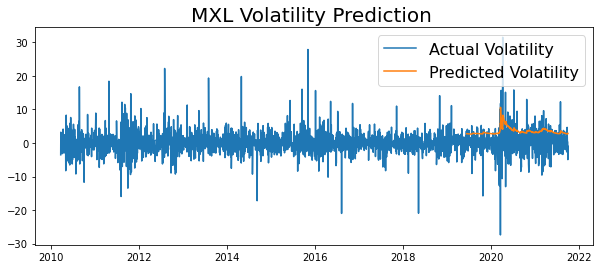

In [17]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns)
preds, = plt.plot(rolling_predictions)
plt.title('MXL Volatility Prediction ', fontsize=20)
plt.legend(['Actual Volatility', 'Predicted Volatility'], fontsize=16)

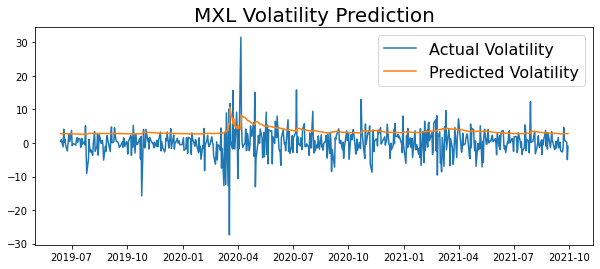

In [19]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-580:])
preds, = plt.plot(rolling_predictions)
plt.title('MXL Volatility Prediction', fontsize=20)
plt.legend(['Actual Volatility', 'Predicted Volatility'], fontsize=16)

In [20]:
mse = mean_squared_error(test, rolling_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, rolling_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, rolling_predictions))
print('RMSE: '+str(rmse))

MSE: 26.685357410223258
MAE: 3.9335720690926994
RMSE: 5.16578720140728
